In [87]:
import pandas as pd
import datetime as dt

In [88]:
# import data

url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"

In [89]:
df = pd.read_csv(url)

In [90]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [91]:
# add a datetime column with to_datetime pandas function to convert to datetime data type
df['datetime'] = pd.to_datetime(df['date'])

In [92]:
# verify changes
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,datetime
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013-01-01
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013-01-02
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013-01-03
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013-01-04
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013-01-05


In [93]:
df.loc[0,'datetime']
df.loc[0,'datetime'].strftime('%B %d %Y')

'January 01 2013'

In [94]:
df.loc['2015':]

,date,meantemp,humidity,wind_speed,meanpressure,datetime
202,2013-07-22,29.500000,80.333333,4.333333,996.833333,2013-07-22
203,2013-07-23,31.857143,70.714286,3.971429,998.000000,2013-07-23
204,2013-07-24,29.714286,84.142857,3.971429,997.142857,2013-07-24
205,2013-07-25,28.333333,84.500000,8.016667,995.166667,2013-07-25
206,2013-07-26,30.000000,73.857143,5.571429,995.428571,2013-07-26
...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016-12-28
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016-12-29
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016-12-30
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016-12-31


### Custom Formats and Errors

In [95]:
# import data
demo = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv', usecols=[0,1])
demo

,date,cloud_cover
0,19790101,2.0
1,19790102,6.0
2,19790103,5.0
3,19790104,8.0
4,19790105,6.0
...,...,...
15336,20201227,1.0
15337,20201228,7.0
15338,20201229,7.0
15339,20201230,6.0


In [96]:
pd.to_datetime(demo['date'], format = '%Y%m%d')

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

#### Baltimore Crime Data

In [97]:
# import data
baltimore = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4lekzpYpo0pA9h1d3KYObIb3lQtAqz289c7jpwckioXvxm4xykz6ZSJpnDwjKTxJ4iqpG0seNJdSZ/pub?gidass=>=312387697&single=true&output=csv')

In [98]:
# convert CrimeDateTime to datetime dtype # use errors argument to turn erroneous values into NaTs
baltimore['CrimeDateTime'] = pd.to_datetime(baltimore['CrimeDateTime'], errors='coerce')
baltimore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527817 entries, 0 to 527816
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   CrimeDateTime  527816 non-null  datetime64[ns, UTC]
 1   Description    527817 non-null  object             
 2   District       526036 non-null  object             
 3   Latitude       526913 non-null  float64            
 4   Longitude      526913 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(2)
memory usage: 20.1+ MB


In [99]:
# count rows with NaTs causing errors
baltimore['CrimeDateTime'].isna().sum()

# drop row(s) with NaTs causing errors
baltimore = baltimore.dropna(subset=['CrimeDateTime'])

# verify changes
baltimore['CrimeDateTime'].isna().sum()

0

In [100]:
# convert CrimeDateTime to datetime dtype after dropping null values
pd.to_datetime(baltimore['CrimeDateTime'])

# verify changes
baltimore.head()

,CrimeDateTime,Description,District,Latitude,Longitude
0,2022-07-09 09:30:00+00:00,ROBBERY - RESIDENCE,NORTHEAST,39.3223,-76.5467
1,2022-07-09 16:00:00+00:00,COMMON ASSAULT,SOUTHERN,39.2821,-76.6355
2,2022-07-09 00:34:28+00:00,SHOOTING,SOUTHWEST,39.2884,-76.6569
3,2022-07-09 00:34:28+00:00,SHOOTING,SOUTHWEST,39.2884,-76.6569
4,2022-07-09 18:00:00+00:00,COMMON ASSAULT,NORTHEAST,39.3188,-76.5872


### Timedeltas & Date Ranges

In [101]:
# import and preview data
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [102]:
# create new datetime column by converting date with .to_datetime
df['datetime'] = pd.to_datetime(df['date'])

# verify changes
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,datetime
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013-01-01
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013-01-02
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013-01-03
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013-01-04
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013-01-05


In [103]:
# set datetime column as index
df = df.set_index('datetime')

In [104]:
# verify changes
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
datetime,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [105]:
# make time delta of 3 days
delta_3d = pd.to_timedelta(3,'D')

# verify changes
delta_3d

# create and preview variable for most humid day
humid_day = df['humidity'].idxmax()
humid_day

Timestamp('2017-01-01 00:00:00')

In [106]:
# create and preview variable to calculate 3 days before humid_day
pre_max = humid_day - delta_3d
pre_max

Timestamp('2016-12-29 00:00:00')

In [107]:
# create and preview variable to calculate 3 days after humid_day
post_max = humid_day + delta_3d
post_max

Timestamp('2017-01-04 00:00:00')

In [108]:
# calculate average windspeed using pre_max and post_max as ranges
mean_windspeed = df.loc['2016-12-29':'2017-01-04', 'wind_speed'].mean()
mean_windspeed

4.89791666675

In [109]:
df['date'].max()

'2017-01-01'

### Time Series Visualizations

In [110]:
# create df 'ts' from meantemp column in existing df
ts = df['meantemp'].copy()
ts

datetime
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

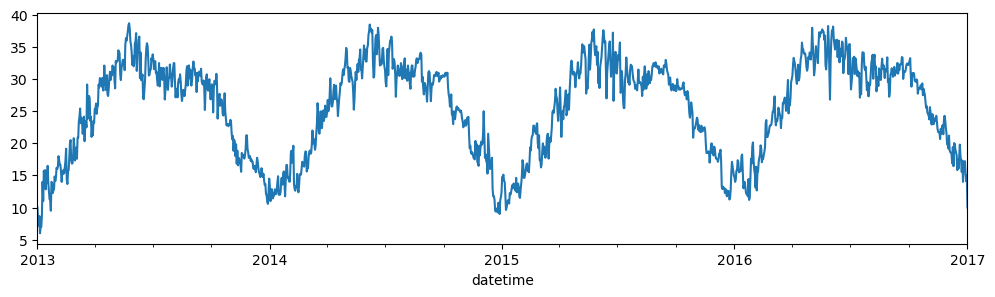

In [111]:
# create simpe plot of mean temp by date
ax = ts.plot()

### Figure Sizes for Time Series

In [112]:
# import plt
import matplotlib.pyplot as plt

# verify default plt dimensions for parameters
plt.rcParams['figure.figsize']

[12.0, 3.0]

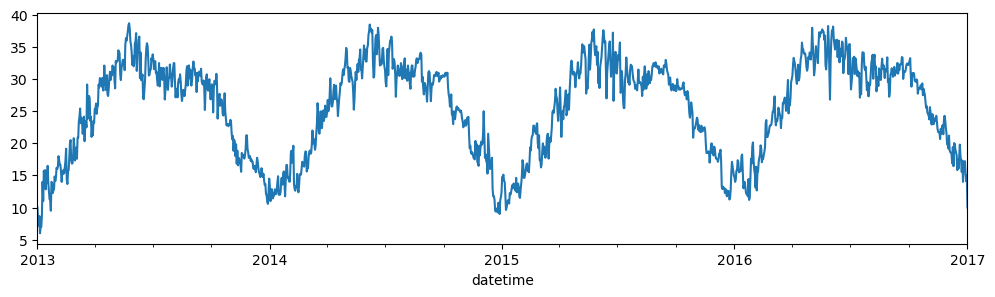

In [113]:
# plot same ts figure using 12x3 dimensions for parameters
ts.plot(figsize=(12,3));

In [114]:
# set figuresize parameters default to 12,3 as used above
plt.rcParams['figure.figsize'] = (12,3)

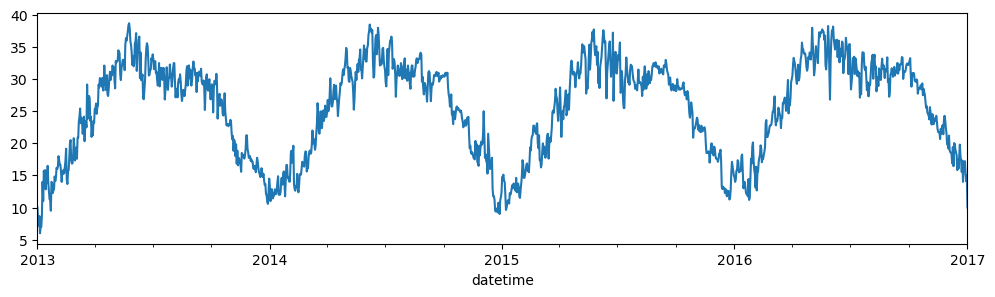

In [115]:
# verify changes
plt.rcParams['figure.figsize']

# verify plot is 12x3 by default without needing to specify parameters
ax = ts.plot();

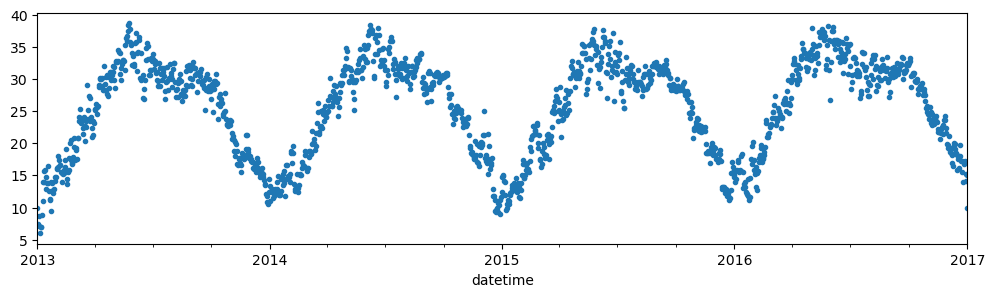

In [116]:
# create plot with markers instead of lines
ax = ts.plot(style='.');

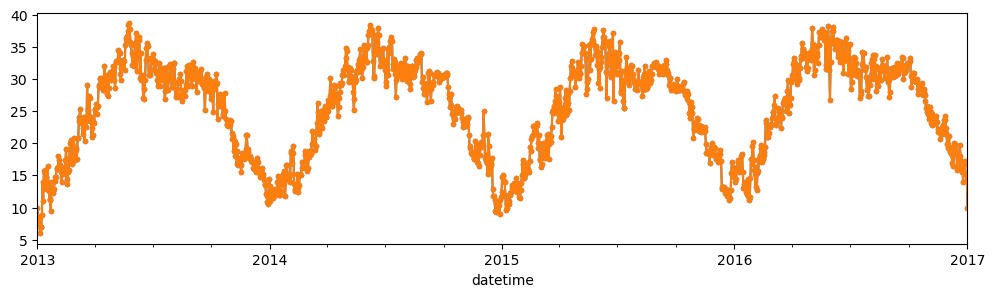

In [117]:
# create plot with markers AND lines using style parameter
ax = ts.plot(style='.-');

# or just using marker parameter

ax = ts.plot(marker='.')

### Formatting Date Xticks

In [118]:
# import mticks and mdates submodules which contain tick-formatting artists
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [119]:
# instantiate appropriate locator and formatter

# locator with optional monthly interval argument
locate_months = mdates.MonthLocator(interval=3)

# formatter with required format (fmt) argument
format_months = mdates.DateFormatter("%B-%y")

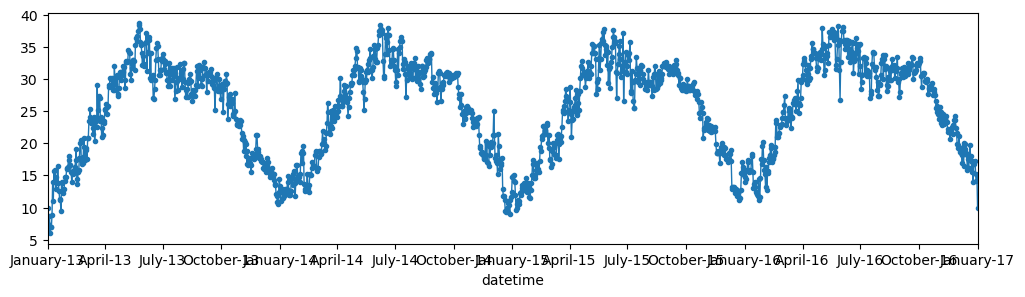

In [120]:
# plot time series with argument for '.' markers and line width = 1
ax = ts.plot(marker = '.', lw=1);

# locator creates
ax.xaxis.set_major_locator(locate_months)

# formatter shows months in 3-month intervals as per locator but causes overlap
ax.xaxis.set_major_formatter(format_months)

### Fixing Overlapping Labels

In [122]:
# 3 ways to get figure instead of just having axis so that we can format

# if already have the axis:
# ax.get_figure()
# if do not already have the axis and are running cell that creates figure
# plt.gcf()

# Make the fig and ax first
# then use fig, ax = plt.subplots()
# followed by ts.plot(ax=ax)


In [124]:
# get fig
fig = ax.get_figure()

# use autofmt_xdate() method
fig.autofmt_xdate()


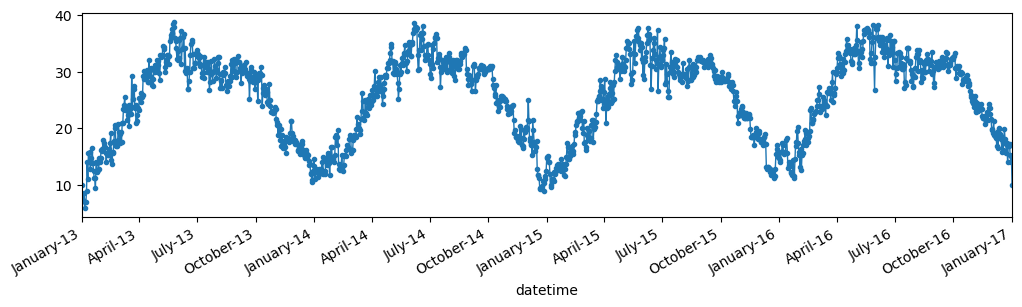

In [126]:
# dates are formatted automatically
fig

### Customizing Our Ticks



In [ ]:
# add ticks for years

In [ ]:
# increase font size of major tick labels

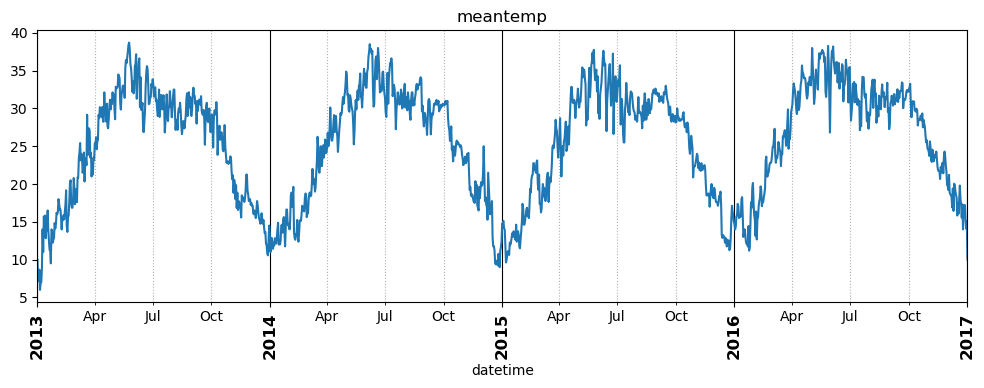

In [127]:
# create plot_dates function for style
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

# call plot_dates function
plot_dates(ts);

## Overhauling Matplotlib Defaults

#### sns.set_context to simplify resizing text

Overall, we have a nice visualization thus far. One major consideration for our final figure is the overall text size and readability.
Instead of manually setting the font size and parameters for every piece of text on our figure (major/minor tick labels, xlabel/ylabel, title, etc.):
we can use seaborn's sns.set_context function!
According to the documentation for the set_context function, it will:
"Set the parameters that control the scaling of plot elements. This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style."


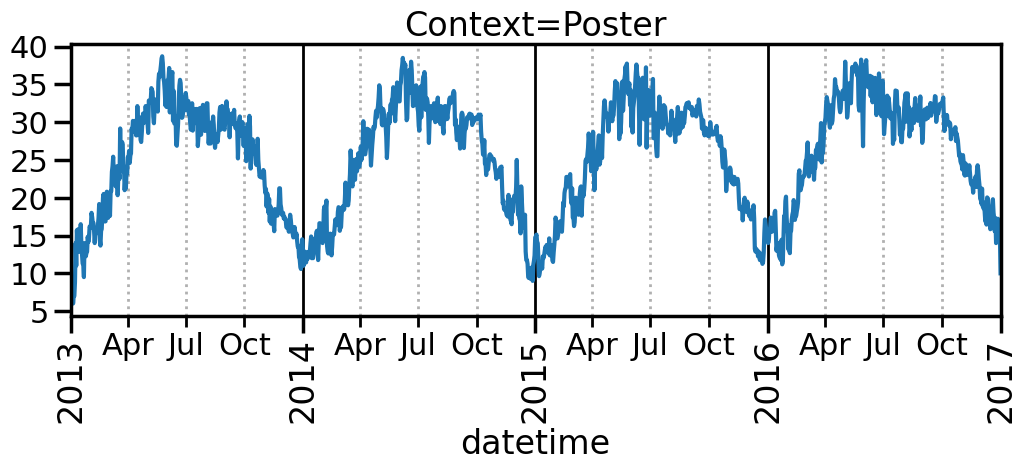

In [134]:
# tempporarily use context with plotting_context instead of set_context
# use with and plotting_context to temporarily apply settings

# import seaborn
import seaborn as sns

with sns.plotting_context('poster'):
    fig, ax = plot_dates(ts, xtick_fontsize=None,xtick_fontweight=None,title="Context=Poster")

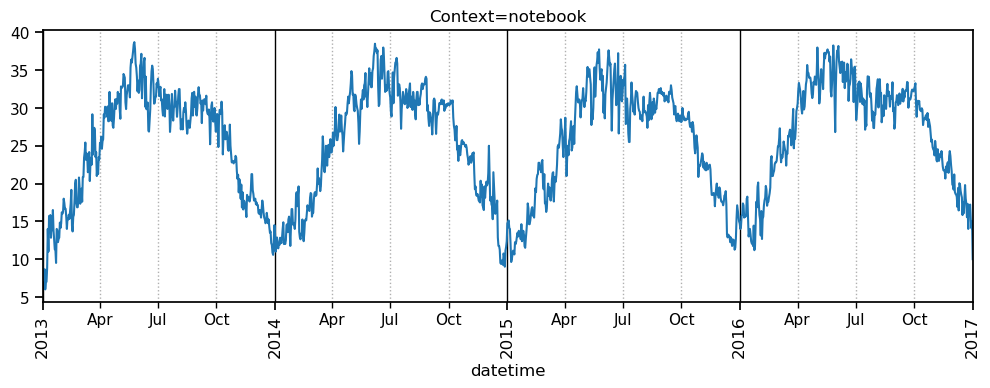

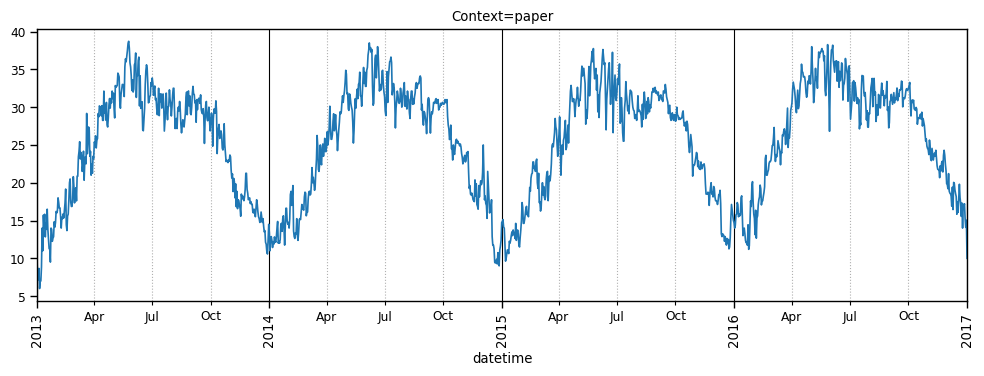

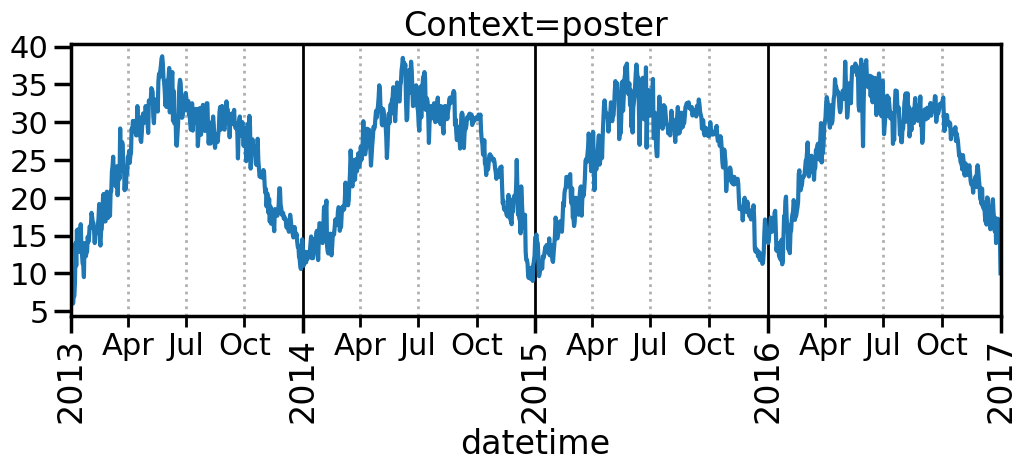

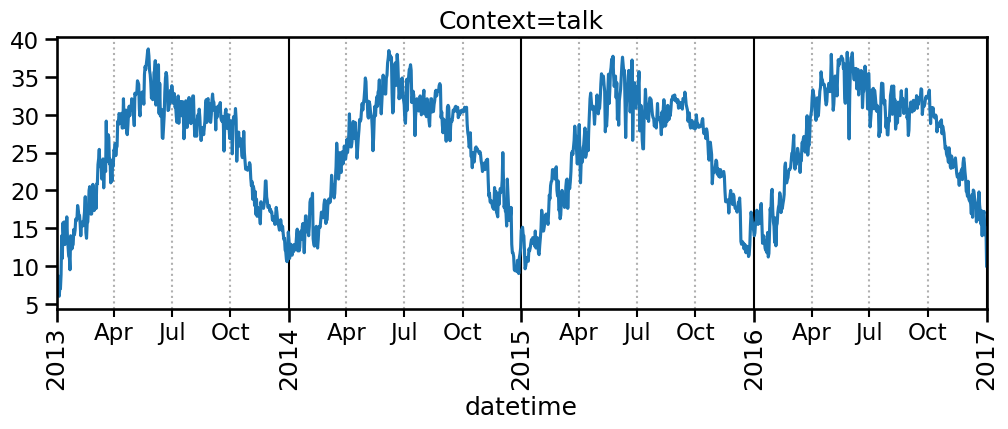

In [139]:
# use for loop to view all viz's for context parameter
## temporarily changing context
for context in ['notebook','paper','poster','talk']:
    with sns.plotting_context(context):
        fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,
                            title=f"Context={context}")

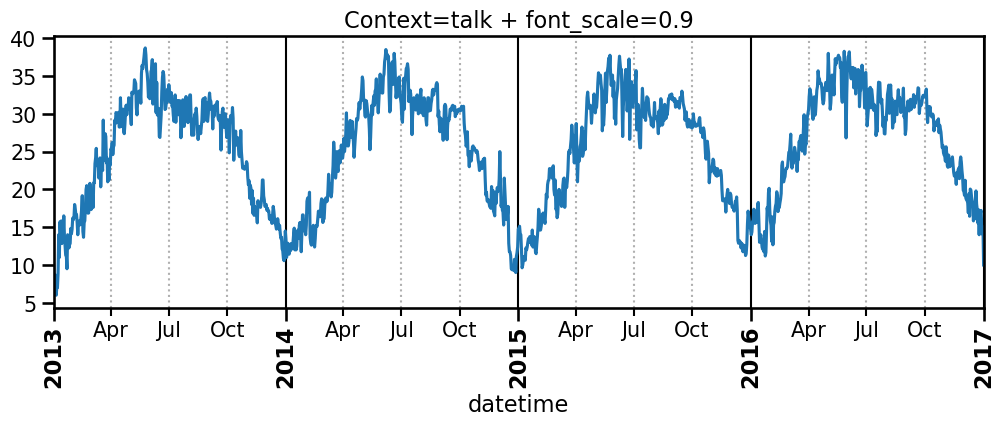

In [140]:
# use plotting_context with context parameter arg = "talk" and font_scale parameter arg = "0.9"
with sns.plotting_context("talk", font_scale=0.9):
    fig,ax = plot_dates(ts,xtick_fontsize=None,
                        xtick_fontweight="bold",
                        title=f"Context=talk + font_scale=0.9")

#### Using set_context

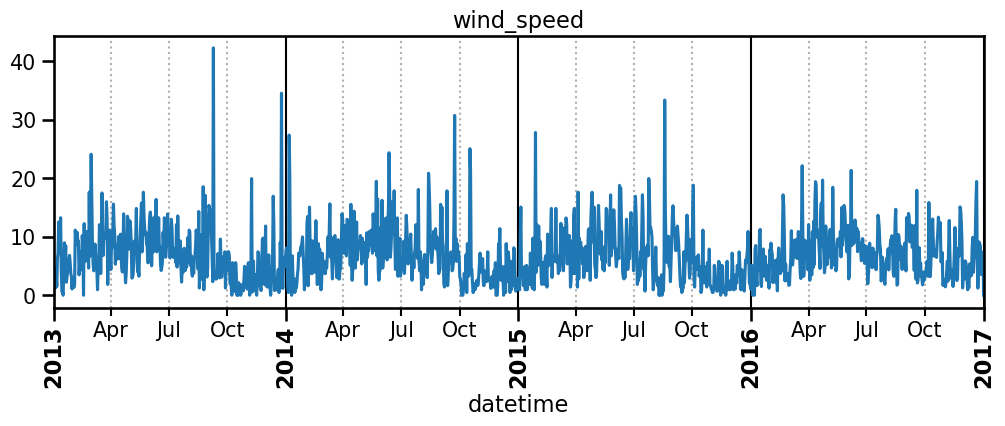

In [145]:
# make settings permanent with set_context instead of plotting_context
sns.set_context("talk", font_scale=0.9)
fig,ax = plot_dates(ts,xtick_fontsize=None,
                    xtick_fontweight="bold")

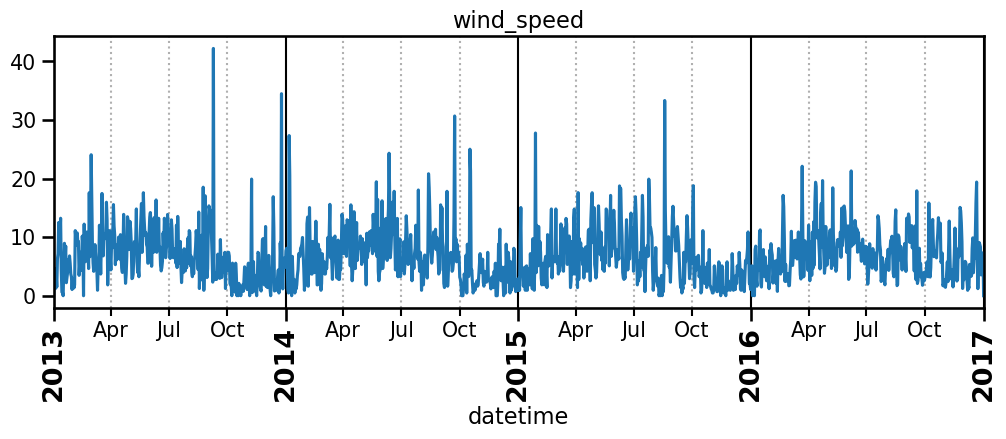

In [143]:
# use same settings to visualize wind_speed instead of meantemp

# assign copy of wind_speed column to ts as df
ts = df['wind_speed'].copy()

# use plot_dates function on ts
plot_dates(ts);

### Resampling and Imputation

In [148]:
# verify index has frequency = None
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

#### Setting the Frequency

In [150]:
# if dates in index are already in desired frequency use df.asfreq(CODE) to set frequency
ts = ts.asfreq('D')

# verify changes made to freq attribute
ts.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq='D')

In [161]:
# test using incorrect frequency as freq attribute

# declare ts again to get back to original data
ts = df['wind_speed'].copy()

# verify freq attribute is None
ts.index

# assign freq attribute of H when we know it should be D
ts = ts.asfreq('H')

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 15:00:00', '2016-12-31 16:00:00',
               '2016-12-31 17:00:00', '2016-12-31 18:00:00',
               '2016-12-31 19:00:00', '2016-12-31 20:00:00',
               '2016-12-31 21:00:00', '2016-12-31 22:00:00',
               '2016-12-31 23:00:00', '2017-01-01 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35065, freq='H')